<a href="https://colab.research.google.com/github/jdberkson/OPTI-556-Computational-Imaging/blob/main/Homework1_JoelB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 OPTI 556 Computational Imaging

### Joel Berkson

In [94]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import numpy as np
from google.colab import files
import matplotlib as mpl
from skimage import io
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.interpolate import interp1d
import math as mt
import warnings
warnings.filterwarnings('ignore')

####Fourier Series

I chose 4 interesting functions to look at.
1. A line with a slope discontinuity that swtiches to a quadratic
2. A triangle function
3. Step function with a step of one and a step of two
4. A cos(x^2) function

In [ ]:
def functions(num,x):
  if num == 1:
    if x < 0:
      f = x
    else:
      f = x**2
  elif num == 2:
    if x < 0:
      f = x+.5
    else:
      f = -x+.5
  elif num == 3:
    if x < -.25:
      f = 0
    elif x >= -.25 and x <=0:
      f = 1
    else:
      f = 3
  elif num == 4:
    f = mt.cos(100*x**2)

  return f

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  from ipykernel import kernelapp as app


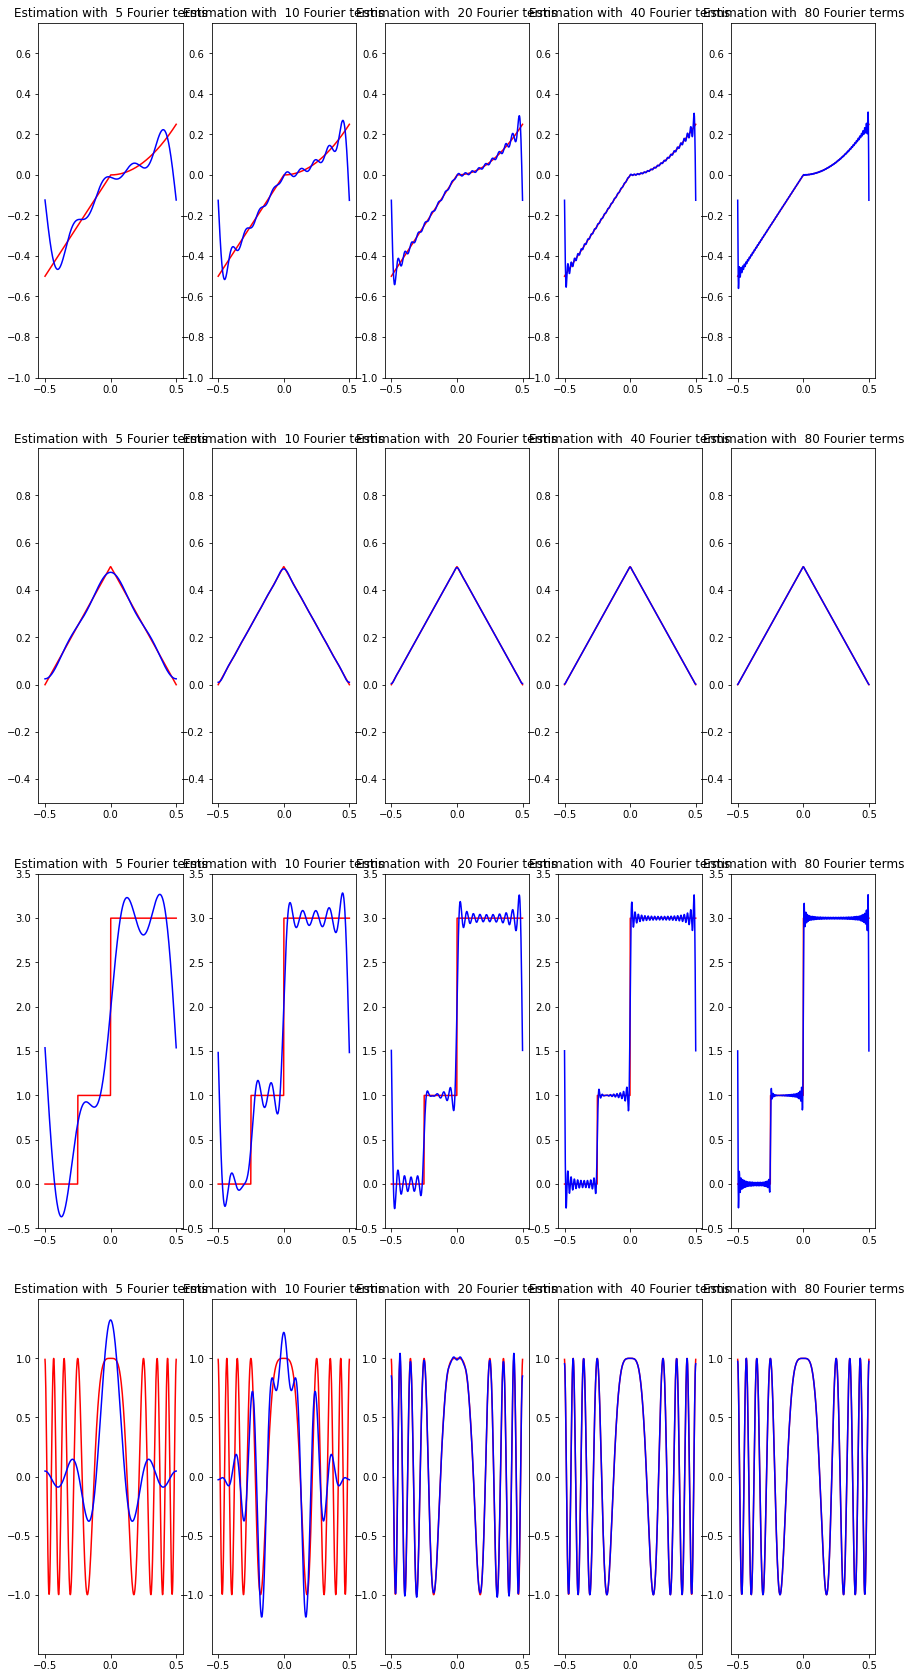

In [ ]:

pt=0;
plt.subplots(figsize=(15,30))
xrange=np.linspace(-.5,.5,500);
vf = vectorize(functions)
for num in [1, 2, 3, 4]:
  
 
  for coeffs in [5, 10, 20, 40, 80]:
    pt=pt+1
    sv=np.zeros(coeffs)
    cv=np.zeros(coeffs)
    for pop in np.arange(coeffs):
      sv[pop]=2*integrate.quad(lambda x: vf(num,x)*np.sin(2*np.pi*pop*x), -.5, .5)[0]
      cv[pop]=2*integrate.quad(lambda x: vf(num,x)*np.cos(2*np.pi*pop*x), -.5, .5)[0]
      cv[0]=cv[0]
      def px(x,sv,cv):
        pxx=0;
        for pop in np.arange(len(sv)):
          pxx=pxx+sv[pop]*np.sin(2*np.pi*pop*x)+cv[pop]*np.cos(2*np.pi*pop*x)
        return pxx
    plt.subplot(4, 5, pt) 
    plt.plot(xrange,vf(num,xrange),'r',xrange,px(xrange,sv,cv)-cv[0]/2.,'b')
    plt.ylim(min(vf(num,xrange))-.5, max(vf(num,xrange))+.5) 
    plt.title("Estimation with  %i Fourier terms" %(pop+1))

    

One thing that kind of surprised me here was that there isn't much(if at all) Gibbs overshoot on the triangle function. It also seemed to converge much more quickly to a good representation more quickly than the other functions. As expected the Gibbs Phenomenon produces an over/undershoot proportional to the amount of discontinuity (~a*.0895 where a is the gap size). Overall, it seems the series representation doesn't have a problem with fitting it slope discontinutites

####Discrete Fourier Transforms (DFTs)

I decided to start with this exploration with just a simple harmonic $cos(2\pi x)$

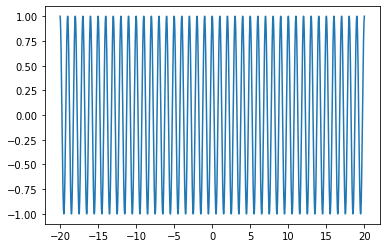

In [31]:
xrange=np.linspace(-20,20,5000)
def fx(x):
  
  fxx=np.cos(2*np.pi*x)
  return fxx
plt.plot(xrange,fx(xrange))

In [ ]:
t

This functions DFT is below, with two delta functions at the +/- frequency

(-20.0, 20.0)

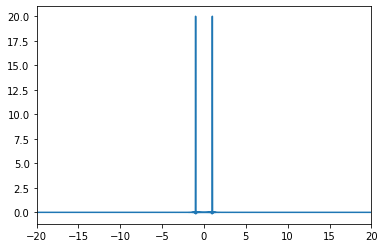

In [72]:
urange=np.arange(-2500./40.,2500./40.,1./40.)
plt.plot(urange,(1./(urange[-1]-urange[0]))*np.real(np.fft.fftshift(np.fft.fft(np.fft.fftshift(fx(xrange))))))
plt.xlim(-20,20)

For this function, lets set $\delta x$ to be 0.4, for B = 1.25 to stay above the Nyquist frequency

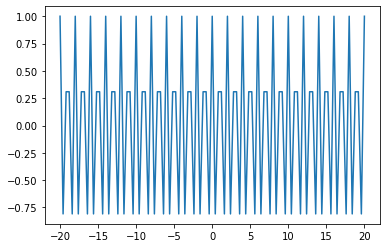

In [50]:
srange=np.arange(-20,20.4,.4)
plt.plot(srange,fx(srange))


And its DFT...

In [66]:
usrange=srange/(.4*40)
plt.plot(usrange,(1./(usrange[-1]-usrange[0]))*np.real(np.fft.fftshift(np.fft.fft(np.fft.fftshift(fx(srange))))))

TypeError: ignored

Since we are above the Nyquist frequency, we should be able to still perfectly reconstruct the signal by replacing each sample point with a sinc (Shannon Interpolation)

Text(0.5, 1.0, 'Interpolated')

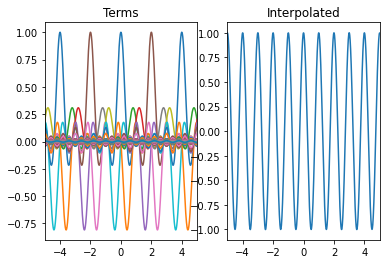

In [92]:
interP=np.zeros(5000)
for pip in np.arange(len(srange)):
  plt.subplot(1,2,1)
  plt.plot(xrange,fx(srange[pip])*np.sinc((usrange[-1]-usrange[0])*(xrange-srange[pip])))
  interP=interP+fx(srange[pip])*np.sinc((usrange[-1]-usrange[0])*(xrange-srange[pip]))
plt.xlim(-5,5)
plt.title('Terms')
plt.subplot(1,2,2)
plt.plot(xrange,interP)
plt.xlim(-5,5)
plt.title('Interpolated')

We can then show the DFT of the reconstructed signal, and compare it to the original:

(-5.0, 5.0)

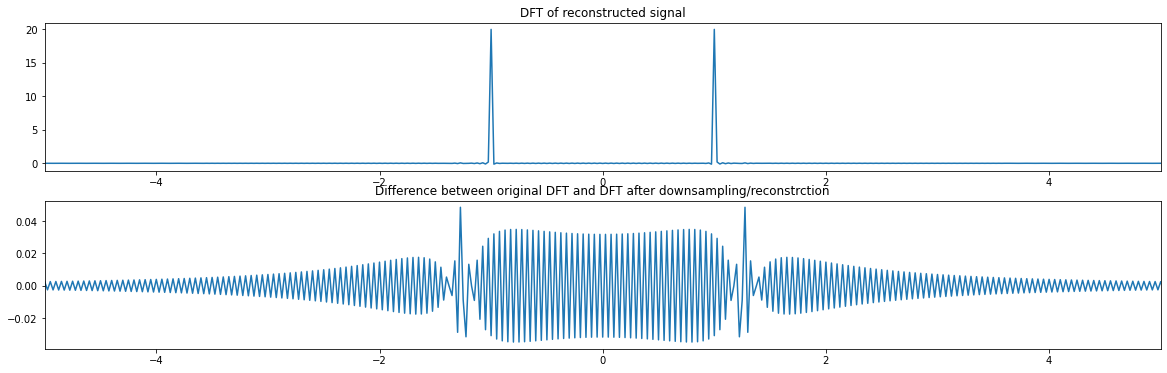

In [89]:
plt.subplots(figsize=(20,6))
plt.subplot(2,1,1)
plt.title('DFT of reconstructed signal')
plt.plot(urange,(1./(urange[-1]-urange[0]))*np.real(np.fft.fftshift(np.fft.fft(np.fft.fftshift(interP)))))
plt.xlim(-5,5)
plt.subplot(2,1,2)
plt.title('Difference between original DFT and DFT after downsampling/reconstrction')
plt.plot(urange,(1./(urange[-1]-urange[0]))*np.real(np.fft.fftshift(np.fft.fft(np.fft.fftshift(interP))))-(1./(urange[-1]-urange[0]))*np.real(np.fft.fftshift(np.fft.fft(np.fft.fftshift(fx(xrange))))))
plt.xlim(-5,5)

The signal is very well reconstructed (SNR ~ 500), but what's interesting here is that it isn't perfect. This is one limitation of using a limited sampling window. Since the sinc function techinically oscillates forever, it is impossible to make a *perfect* reconstruction, because in reality you are interpolating a function *times* a **rect**() function (window). Using a larger window (greater than the -20 to 20 that I used) would improve the reconstruction

Then, interpolating with linear and cubic interpolation doesn't create perfect reconstruction, but cubic seems to be more accurate than linear (As expected).

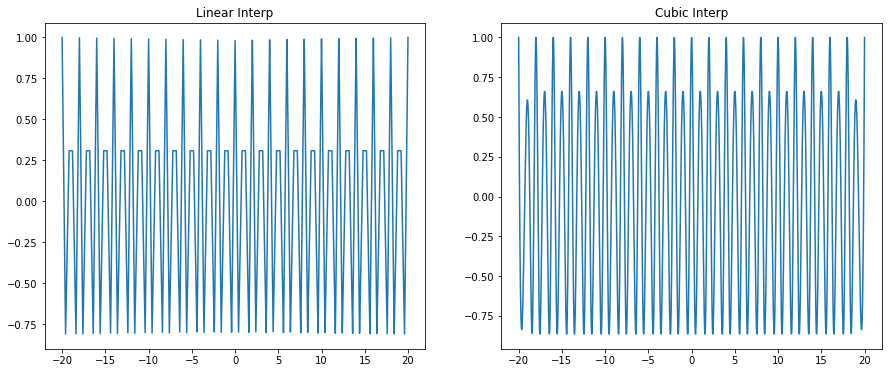

In [90]:
plt.subplots(figsize=(15,6))
interp_lin = interp1d(srange,fx(srange), kind='linear',fill_value='extrapolate')
plt.subplot(1,2,1)
plt.title('Linear Interp')
plt.plot(xrange,interp_lin(xrange))
interp_cub = interp1d(srange,fx(srange), kind='cubic',fill_value='extrapolate')
plt.subplot(1,2,2)
plt.title('Cubic Interp')
plt.plot(xrange,interp_cub(xrange))

####Discrete Wavelet Transforms (DWTs)

In [95]:
pop=io.imread('dubaiBridge.jpg',as_gray=True)

AttributeError: ignored

####Aliasing and Low Pass Filters (LPFs)

####Singular Value Spectra